# Data Project - Stock Market Analysis
Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

**Basic Analysis of Stock Information**

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

/home/jarturomora/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# List of stock symbols to analyse
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Analysis dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) # One year after Today

In [3]:
# Create a data frame with the stock information of each symbol.
# I used a dictionary comprehension instead of a foor-loop and global variables as proposed in the course.
symbols = {stock:DataReader(stock, 'yahoo', start, end) for stock in tech_list}

In [10]:
# Accessing stock information about AAPL.
symbols['AAPL'].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-19,130.690002,130.880005,129.639999,130.070007,44633200,127.460128
2015-05-20,130.000000,130.979996,129.339996,130.059998,36454900,127.450319
2015-05-21,130.070007,131.630005,129.830002,131.389999,39730400,128.753634
2015-05-22,131.600006,132.970001,131.399994,132.539993,45596000,129.880553
2015-05-26,132.600006,132.910004,129.119995,129.619995,70697600,127.019145


In [11]:
symbols['AAPL'].describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,111.578972,112.640711,110.381462,111.514110,4.817742e+07,110.060540
std,11.117226,11.003885,11.204459,11.076219,2.086313e+07,10.423067
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,102.389999,105.180000,101.779999,103.010002,3.364920e+07,101.899587
50%,111.750000,112.559998,110.110001,111.860001,4.433120e+07,110.367613
75%,118.980003,119.860001,117.750000,119.080002,5.567880e+07,117.522875
max,132.850006,132.970001,131.399994,132.539993,1.622063e+08,129.880553


In [12]:
symbols['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-05-19 to 2016-05-18
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


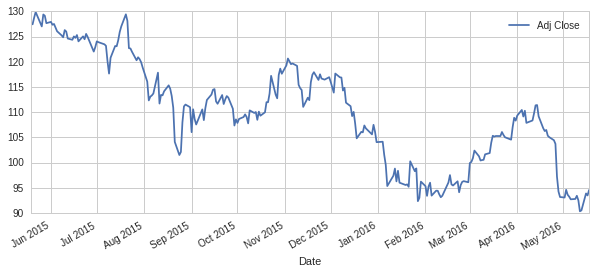

In [19]:
# Quick graphical analysis
symbols['AAPL']['Adj Close'].plot(legend = True, figsize = (10, 4))

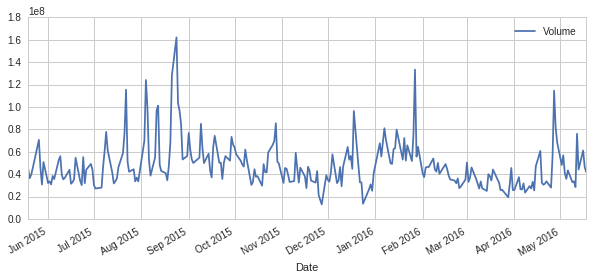

In [20]:
symbols['AAPL']['Volume'].plot(legend = True, figsize = (10, 4))